In [1]:
#importing relevant modules
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = pd.read_csv("Agora.csv", engine='python')
df.columns = df.columns.str.replace(' ', '')
df = df.drop(df[df["Price"].str.contains('BTC') == False].index) # data cleaning - price
df['Price'] = df['Price'].str.replace(' BTC', '')

main_url = r"https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency=BTC&to_currency=USD&apikey=R91K0VILGZN3N76I"
req_ob = requests.get(main_url) 
result = req_ob.json() 
ans =  result["Realtime Currency Exchange Rate"] ['5. Exchange Rate']
ans = float(ans)


In [6]:
# Create the pandas DataFrame
df_vendors = df.groupby('Vendor').size().reset_index(name='Count')

print("Average listings of a vendor: " + str(df_vendors.mean()[0]) + " items.")

df_categories = df.groupby('Category').size().reset_index(name='Count').sort_values(by=['Count'], ascending=False)
df_categories = df_categories.drop(df_categories[df_categories['Count'] < 2].index)


#print(df['Price'])

Average listings of a vendor: 34.38244514106583 items.


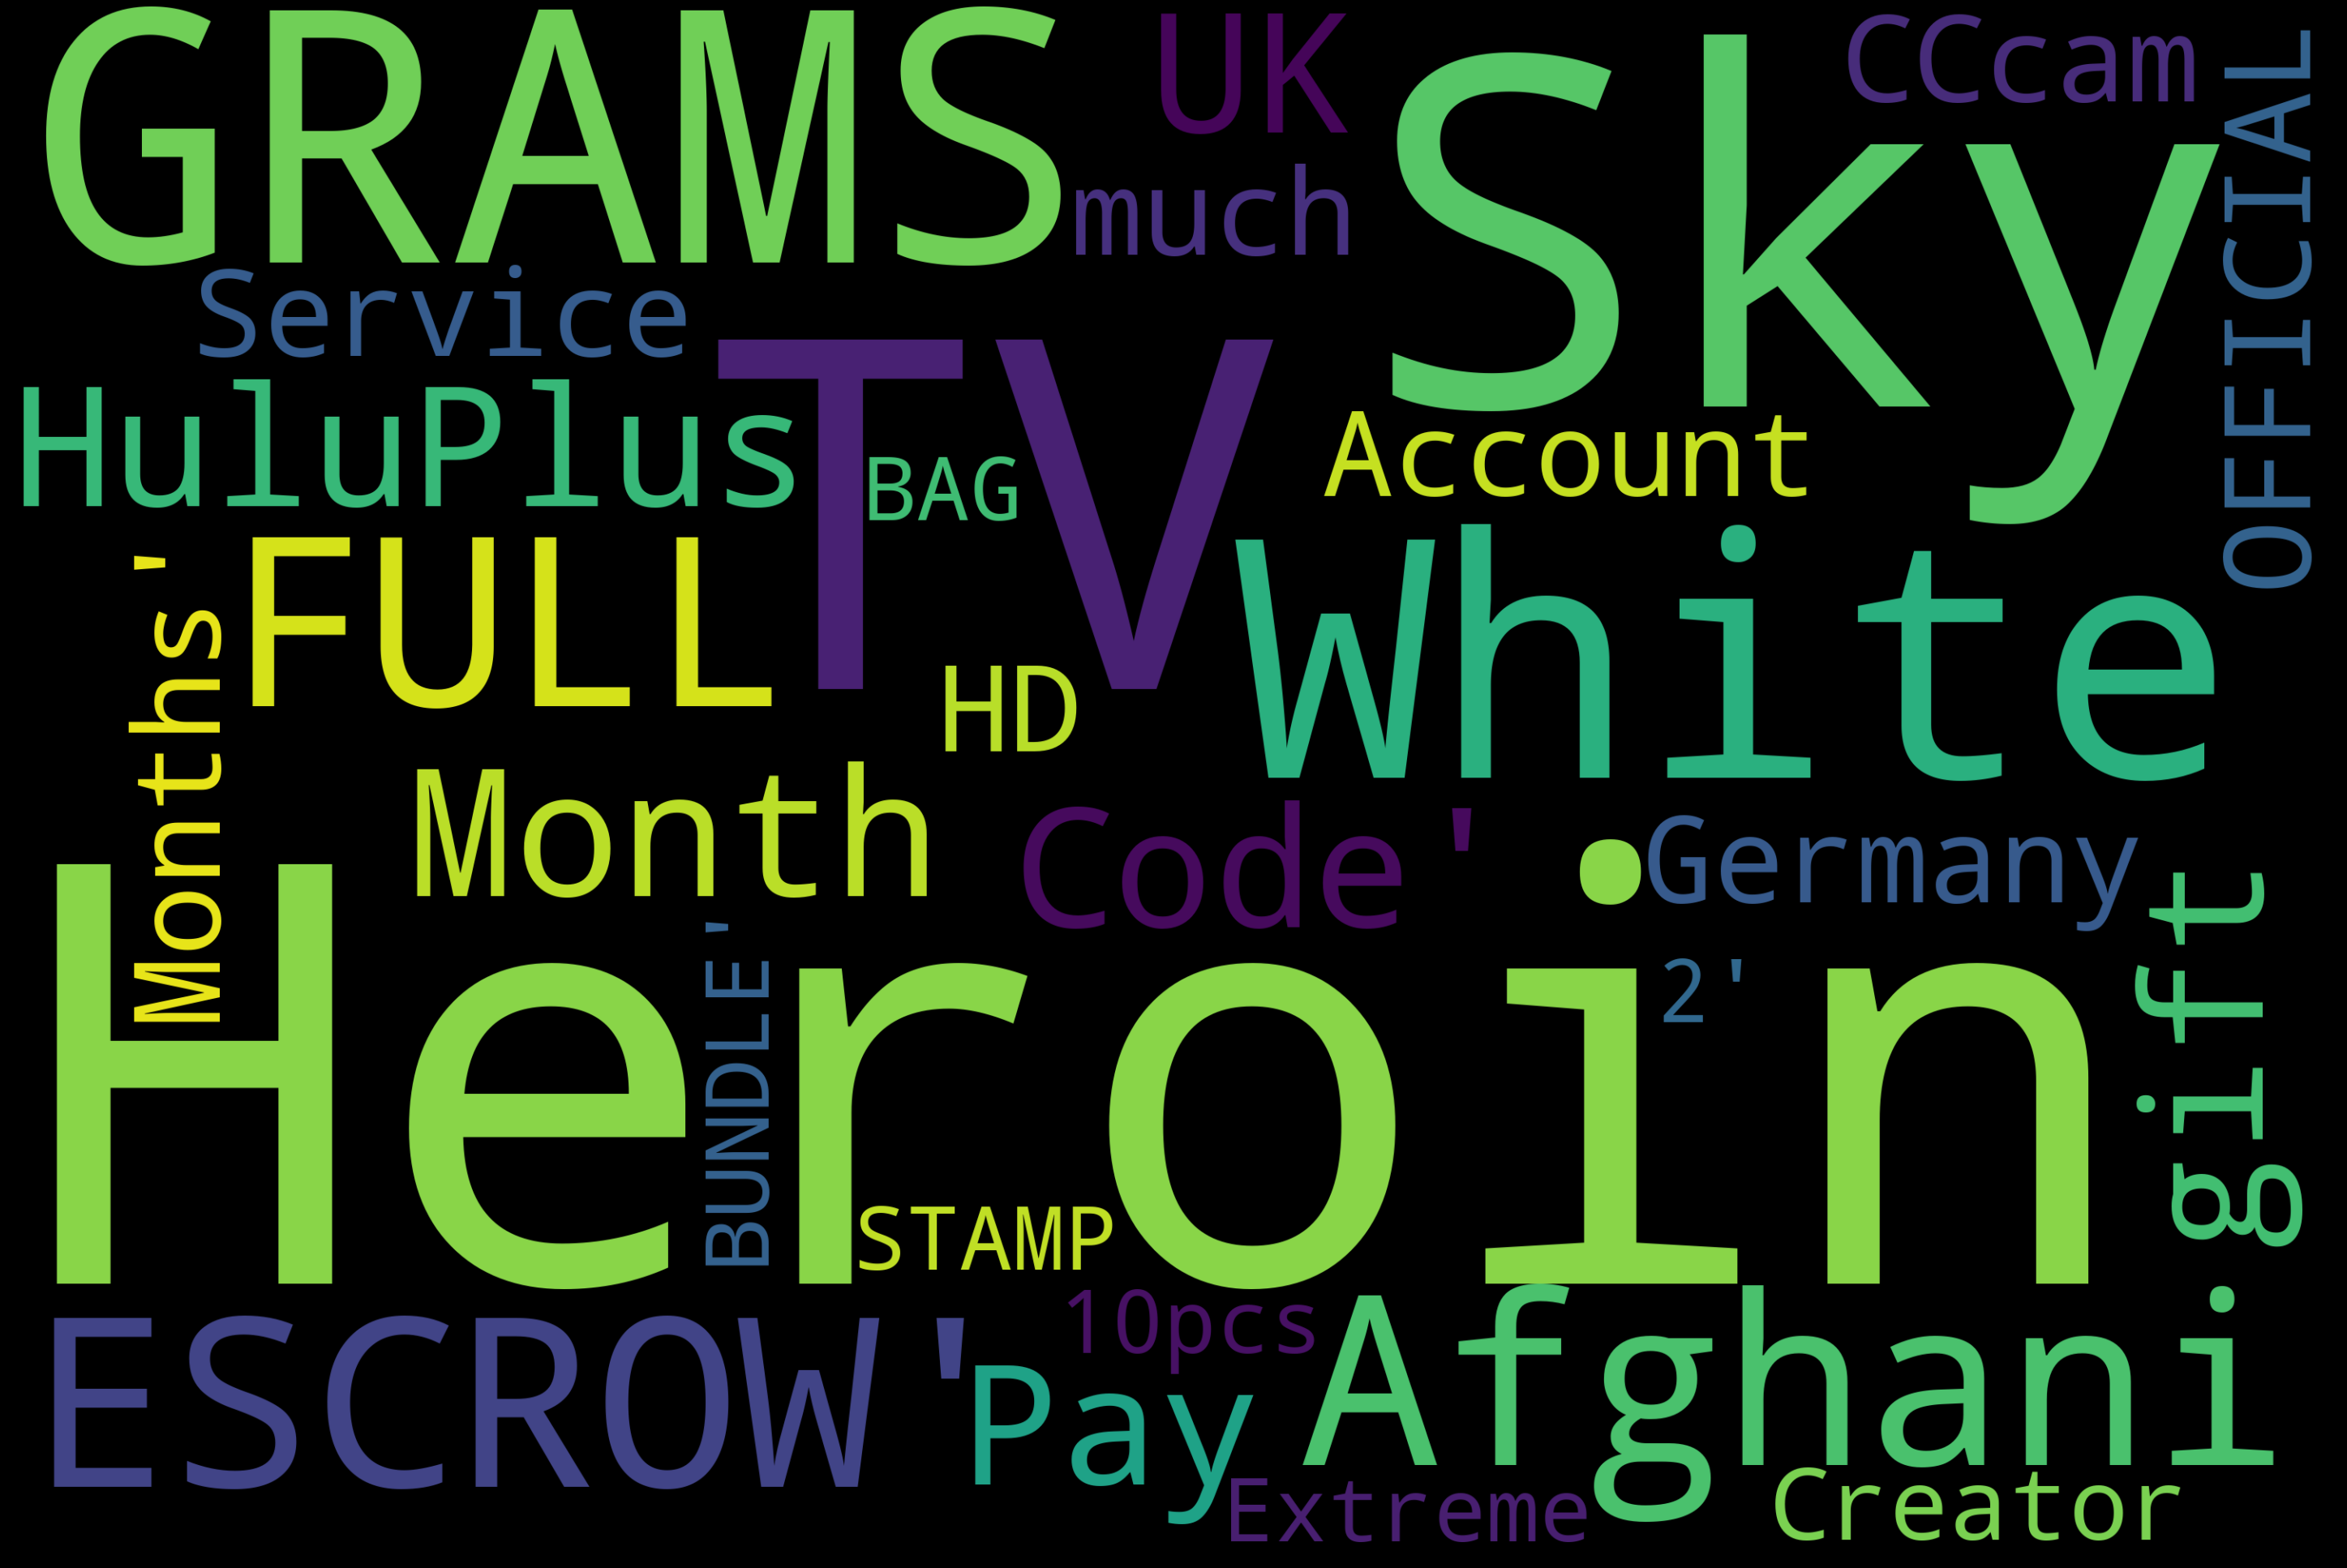

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df.Item.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()




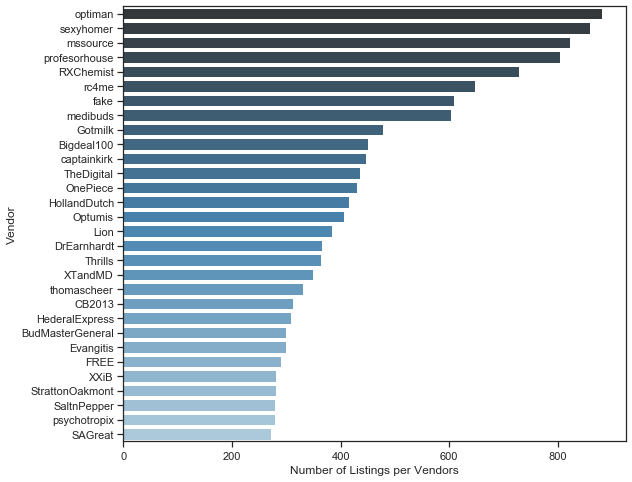

In [22]:
import seaborn as sns

f, ax = plt.subplots(figsize=[9,8])
sns.countplot(y=df.loc[df.Vendor.isin(df["Vendor"].value_counts().index[0:30]),"Vendor"],order=df["Vendor"].value_counts().index[:n],palette="Blues_d",ax=ax)
ax.set_xlabel('Number of Listings per Vendors')
plt.show()

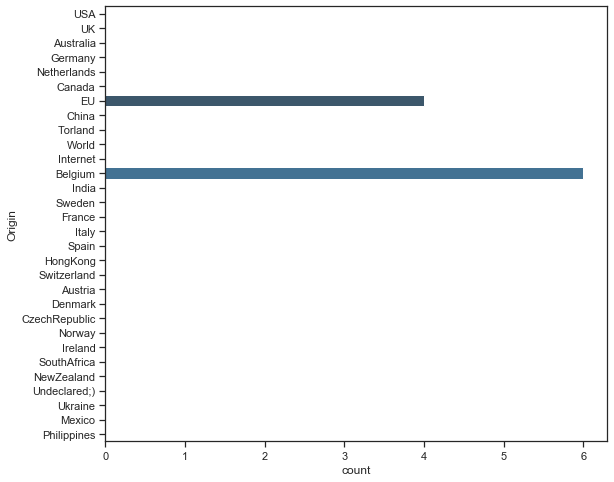

In [40]:
import seaborn as sns


f, ax = plt.subplots(figsize=[9,8])
sns.countplot(y=df.loc[df.Vendor.isin(df["Origin"].value_counts().index[0:30]),"Origin"],order=df["Origin"].value_counts().index[:30],palette="Blues_d",ax=ax)

In [ ]:
#pie table of listings per origin
#pie table of listing per destination